Note: you may need to restart the kernel to use updated packages.
Churn Rate:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Average tenure by churn status:
Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64


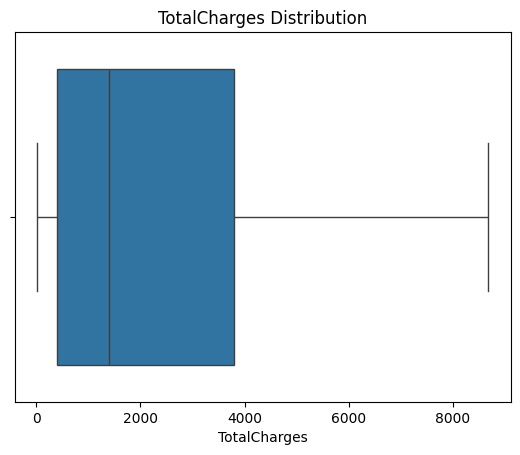

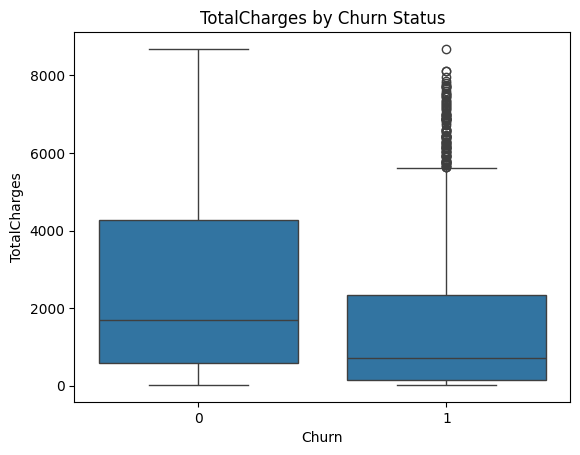

In [1]:
# If seaborn isn't installed, install it first
%pip install seaborn

# --- Step 1: Import Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 2: Load Data ---
df = pd.read_csv("Telco-Customer-Churn.csv")

# --- Step 3: Clean Data ---

# Convert TotalCharges to numeric (some are spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Drop customerID — not useful
df = df.drop(columns=["customerID"])

# Standardize Yes/No columns
yes_no_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "PaperlessBilling", "Churn"
]

for col in yes_no_cols:
    df[col] = df[col].str.strip().str.lower()
    df[col] = df[col].map({"yes": 1, "no": 0})

# --- Step 4: Quick Insights ---
print("Churn Rate:")
print(df["Churn"].value_counts(normalize=True))

print("\nAverage tenure by churn status:")
print(df.groupby("Churn")["tenure"].mean())

# --- Step 5: Boxplots ---

# Distribution of TotalCharges
sns.boxplot(x=df["TotalCharges"])
plt.title("TotalCharges Distribution")
plt.show()

# TotalCharges by Churn
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("TotalCharges by Churn Status")
plt.show()

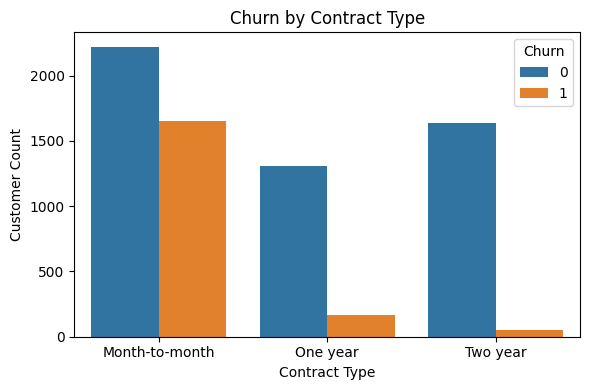

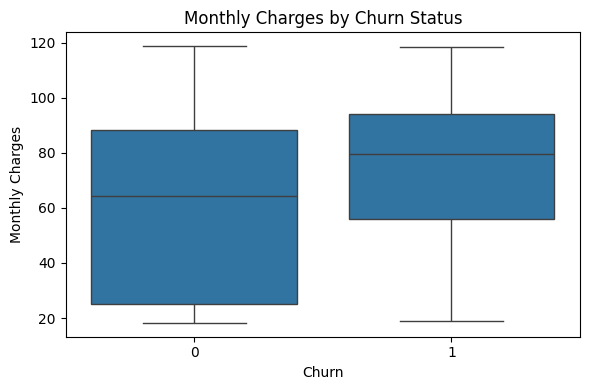

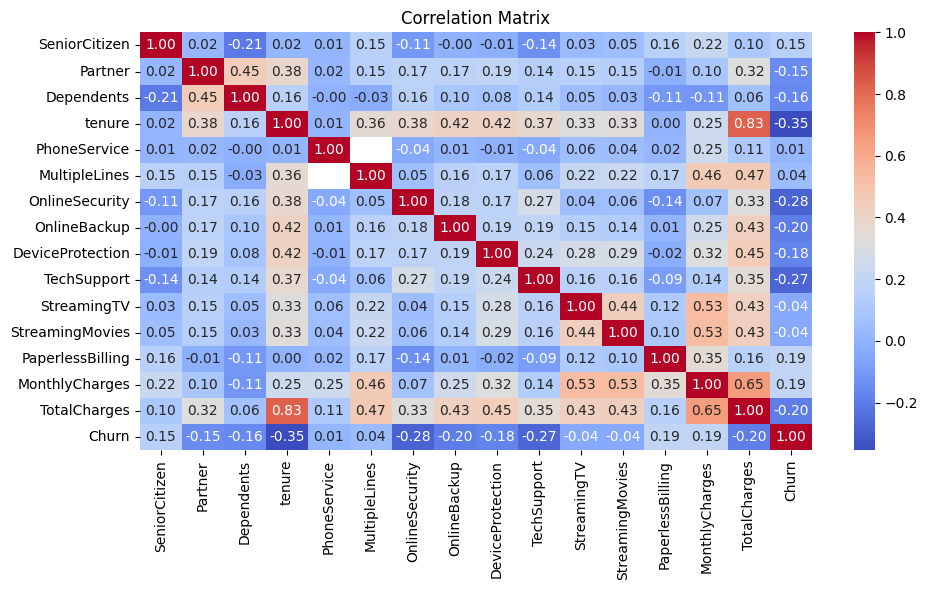

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Churn Rate by Contract Type ---
plt.figure(figsize=(6, 4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

# --- 2. Monthly Charges by Churn Status ---
plt.figure(figsize=(6, 4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.tight_layout()
plt.show()

# --- 3. Correlation Heatmap ---
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()